##### Question 1: Pandas - Data Exploration & Filtering

Part A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
patients = pd.read_csv('column_3C_weka.csv')

# First 5 rows
print(patients.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  


In [5]:
shape = patients.shape
print(f"Dataset shape is: {shape}")

Dataset shape is: (310, 7)


In [7]:
print("Colunms and their data types:")
patients.dtypes

Colunms and their data types:


pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Part B

In [32]:
# Filtering out severe patients with provided thresholds
severe_patients = patients[
    (patients['degree_spondylolisthesis'] > 30) |
    (patients['pelvic_incidence'] > 70)
]

# Checking result
severe_patients.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,spondylo_zscore
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,Hernia,-0.567934
60,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Spondylolisthesis,0.795480
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Spondylolisthesis,1.752890
63,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Spondylolisthesis,0.016938
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Spondylolisthesis,-0.423077


In [ ]:
# Getting number of severe patients
num_of_severe_patients = len(severe_patients)

# Computing frequencies of values in class column
class_dist = severe_patients["class"].value_counts()

In [14]:
# Displaying results
print(f"There are {num_of_severe_patients} severe patients in the dataset.")
print("\n")
print("Class distribution for severe patients: ")
print(class_dist)

There are 136 severe patients in the dataset.


Class distribution for severe patients: 
class
Spondylolisthesis    128
Normal                 7
Hernia                 1
Name: count, dtype: int64


##### Question 2: Pandas - Group Analysis

In [17]:
# Group statistics
class_stats = patients.groupby('class').agg({
    # Mean of degree_spondylolisthesis
    "degree_spondylolisthesis": "mean",

    # Mean of pelvic_incidence
    "pelvic_incidence": "mean",

    # SD of lumbar_lordosis_angle
    "lumbar_lordosis_angle": "std",

    # Count of patients
    "class": "count"
})

# Checking result
class_stats

,degree_spondylolisthesis,pelvic_incidence,lumbar_lordosis_angle,class
class,,,,
Hernia,2.480251,47.638407,9.767795,60
Normal,2.186572,51.685244,12.361388,100
Spondylolisthesis,51.896687,71.514224,16.397068,150


In [18]:
# Renaming last column
class_stats = class_stats.rename(columns={"class": "patient_counts"})

# Print result
print(class_stats)

                   degree_spondylolisthesis  pelvic_incidence  \
class                                                           
Hernia                             2.480251         47.638407   
Normal                             2.186572         51.685244   
Spondylolisthesis                 51.896687         71.514224   

                   lumbar_lordosis_angle  patient_counts  
class                                                     
Hernia                          9.767795              60  
Normal                         12.361388             100  
Spondylolisthesis              16.397068             150  


b) The highest average degree_spondylolisthesis has Spondylolisthesis

Question 3: NumPy - Statistical Analysis

In [19]:
# a) NumPy statistics
pelvic_incidence_array = patients['pelvic_incidence'].to_numpy()

mean_pi = np.mean(pelvic_incidence_array)
median_pi = np.median(pelvic_incidence_array)
std_pi = np.std(pelvic_incidence_array)
p25 = np.percentile(pelvic_incidence_array, 25)
p75 = np.percentile(pelvic_incidence_array, 75)

print("Pelvic Incidence Statistics:")
print(f"Mean: {mean_pi:.2f}")    # :.2f to round numbers to 2 decimals
print(f"Median: {median_pi:.2f}")
print(f"Std Dev: {std_pi:.2f}")
print(f"25th percentile: {p25:.2f}")
print(f"75th percentile: {p75:.2f}")

# b) Z-score normalization using NumPy
spondylo_array = patients['degree_spondylolisthesis'].to_numpy()

# Calculate z-scores (vectorized operation!)
spondylo_mean = np.mean(spondylo_array)
spondylo_std = np.std(spondylo_array)
# z = (x - mean) / std    applied vectorized
spondylo_zscore = (spondylo_array - spondylo_mean) / spondylo_std

# Add to dataframe
patients['spondylo_zscore'] = spondylo_zscore

# Count outliers (|z-score| > 2)
outliers = np.abs(spondylo_zscore) > 2
num_outliers = np.sum(outliers)

print(f"\nNumber of outliers (|z-score| > 2): {num_outliers}")
print(f"Percentage of outliers: {(num_outliers/len(patients)*100):.1f}%")

Pelvic Incidence Statistics:
Mean: 60.50
Median: 58.69
Std Dev: 17.21
25th percentile: 46.43
75th percentile: 72.88

Number of outliers (|z-score| > 2): 9
Percentage of outliers: 2.9%


Question 4: Matplotlib - Visualization

/tmp/ipykernel_28608/362195665.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(diagnosis_groups,


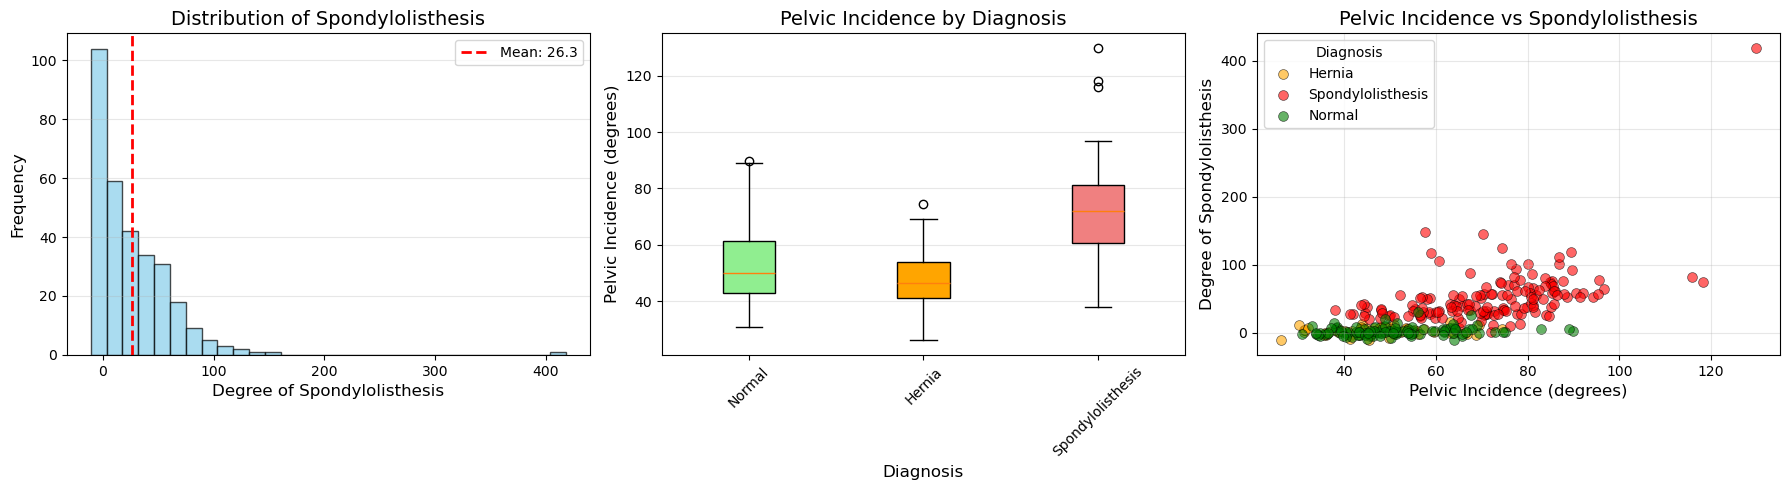

In [20]:
# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Histogram
axes[0].hist(patients['degree_spondylolisthesis'], bins=30, 
             color='skyblue', edgecolor='black', alpha=0.7)
mean_spondylo = patients['degree_spondylolisthesis'].mean()
axes[0].axvline(mean_spondylo, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_spondylo:.1f}')
axes[0].set_xlabel('Degree of Spondylolisthesis', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Spondylolisthesis', fontsize=14)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Box plot
# Prepare data for box plot
diagnosis_groups = [
    patients[patients['class'] == 'Normal']['pelvic_incidence'],
    patients[patients['class'] == 'Hernia']['pelvic_incidence'],
    patients[patients['class'] == 'Spondylolisthesis']['pelvic_incidence']
]

bp = axes[1].boxplot(diagnosis_groups, 
                      labels=['Normal', 'Hernia', 'Spondylolisthesis'],
                      patch_artist=True)
# Color the boxes
colors = ['lightgreen', 'orange', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes[1].set_ylabel('Pelvic Incidence (degrees)', fontsize=12)
axes[1].set_xlabel('Diagnosis', fontsize=12)
axes[1].set_title('Pelvic Incidence by Diagnosis', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Scatter plot
# Color by class
colors_map = {'Normal': 'green', 'Hernia': 'orange', 'Spondylolisthesis': 'red'}
for diagnosis in patients['class'].unique():
    diagnosis_data = patients[patients['class'] == diagnosis]
    axes[2].scatter(diagnosis_data['pelvic_incidence'], 
                    diagnosis_data['degree_spondylolisthesis'],
                    c=colors_map[diagnosis], 
                    label=diagnosis, 
                    alpha=0.6, 
                    s=50,
                    edgecolors='black',
                    linewidth=0.5)

axes[2].set_xlabel('Pelvic Incidence (degrees)', fontsize=12)
axes[2].set_ylabel('Degree of Spondylolisthesis', fontsize=12)
axes[2].set_title('Pelvic Incidence vs Spondylolisthesis', fontsize=14)
axes[2].legend(title='Diagnosis')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('orthopedic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Question 5: Pandas - Correlation & Complex Query

In [21]:
# Part A: Correlation
numeric_data = patients.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

Correlation Matrix:
                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                     1.000        0.629   
pelvic_tilt                          0.629        1.000   
lumbar_lordosis_angle                0.717        0.433   
sacral_slope                         0.815        0.062   
pelvic_radius                       -0.247        0.033   
degree_spondylolisthesis             0.639        0.398   
spondylo_zscore                      0.639        0.398   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                          0.717         0.815         -0.247   
pelvic_tilt                               0.433         0.062          0.033   
lumbar_lordosis_angle                     1.000         0.598         -0.080   
sacral_slope                              0.598         1.000         -0.342   
pelvic_radius                            -0.080        -0.342          1.000   
degree_spondylolisthesis   

In [22]:
type(correlation_matrix)

pandas.core.frame.DataFrame

In [ ]:
# Flatten matrix with unstack()
corr_pairs = correlation_matrix.unstack()

# Check result
corr_pairs
type(corr_pairs)

pandas.core.series.Series

In [ ]:
# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

#corr_pairs

In [ ]:
# Sort by correlation descending
strongest_pair = corr_pairs.sort_values(ascending=False).head(1)

print("Strongest positive correlation:")
print(strongest_pair)

Strongest positive correlation:
pelvic_incidence  sacral_slope    0.81496
dtype: float64


In [31]:
# Part B: Complex filtering
specific_patients = patients[
    (patients['pelvic_incidence'] >= 50) &
    (patients['pelvic_incidence'] <= 70) &
    (patients['degree_spondylolisthesis'] > 20) &
    (patients['class'] == 'Spondylolisthesis')
]

specific_patients.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,spondylo_zscore
69,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Spondylolisthesis,0.047015
73,55.512212,20.095157,44.000000,35.417055,122.648753,34.552946,Spondylolisthesis,0.220176
77,58.782548,7.667044,53.338941,51.115504,98.501157,51.584125,Spondylolisthesis,0.674360
78,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Spondylolisthesis,0.182967
86,59.785265,17.879323,59.206461,41.905942,119.319111,22.123869,Spondylolisthesis,-0.111280


In [33]:
print(f"\nPatients matching criteria: {len(specific_patients)}")
print(f"Percentage of total: {(len(specific_patients)/len(patients)*100):.1f}%")


Patients matching criteria: 47
Percentage of total: 15.2%


Question 6: Pandas - Summary Report Creation

In [34]:
# a) Create abnormal flag
patients['abnormal'] = patients['class'].isin(['Hernia', 'Spondylolisthesis'])

# OR
patients['abnormal'] = patients['class'] != 'Normal'

print(f"Normal patients: {(~patients['abnormal']).sum()}")
print(f"Abnormal patients: {patients['abnormal'].sum()}")

# b) Compare groups
comparison = patients.groupby('abnormal').agg({
    'pelvic_incidence': 'mean',
    'pelvic_tilt': 'mean',
    'lumbar_lordosis_angle': 'mean',
    'sacral_slope': 'mean',
    'pelvic_radius': 'mean',
    'degree_spondylolisthesis': 'mean'
})

comparison['patient_count'] = patients.groupby('abnormal').size()

print("\nNormal vs Abnormal Comparison:")
print(comparison.round(2))

# Which features differ most?
differences = comparison.loc[True] - comparison.loc[False]
biggest_diff = differences.drop('patient_count').abs().idxmax()

print(f"\nFeature with biggest difference: {biggest_diff}")
print(f"Difference: {differences[biggest_diff]:.2f}")

Normal patients: 100
Abnormal patients: 210

Normal vs Abnormal Comparison:
          pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
abnormal                                                                       
False                51.69        12.82                  43.54         38.86   
True                 64.69        19.79                  55.93         44.90   

          pelvic_radius  degree_spondylolisthesis  patient_count  
abnormal                                                          
False            123.89                      2.19            100  
True             115.08                     37.78            210  

Feature with biggest difference: degree_spondylolisthesis
Difference: 35.59
